In [1]:
!pip install pandas seaborn nltk matplotlib wordcloud scikit-learn

In [2]:
import pandas as pd
import seaborn as sns 
import nltk
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
df = pd.read_csv('meesho_reviews_with_ratings.csv')

In [4]:
df.head()

,rating,review
0,4.0,NaN
1,5.0,NaN
2,5.0,Very nice colors and nice clothes and Good fit...
3,4.1,Kurti is very good 👌👌👌 Best for daily wear ❤️ ...
4,4.4,I bought this Kurti for 196 rs and it is worth...


In [5]:
df.dtypes #types of data present


rating    float64
review     object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7508 entries, 0 to 7507
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rating  7508 non-null   float64
 1   review  7246 non-null   object 
dtypes: float64(1), object(1)
memory usage: 117.4+ KB


In [7]:
df.isnull().sum() #missing values


rating      0
review    262
dtype: int64

In [8]:
df = df.dropna()
df.isnull().sum()


rating    0
review    0
dtype: int64

In [9]:
df.shape


(7246, 2)

In [10]:
df.head()

,rating,review
2,5.0,Very nice colors and nice clothes and Good fit...
3,4.1,Kurti is very good 👌👌👌 Best for daily wear ❤️ ...
4,4.4,I bought this Kurti for 196 rs and it is worth...
5,3.6,Jaisa dikhaya tha same to same aaya hai fabric...
6,3.8,Nice kurti kafi axa kurt ha kapda v Bhot acha ...


In [11]:
df['rating'].unique()

array([5. , 4.1, 4.4, 3.6, 3.8, 4. , 4.2, 3.9, 1. , 3. , 2. ])

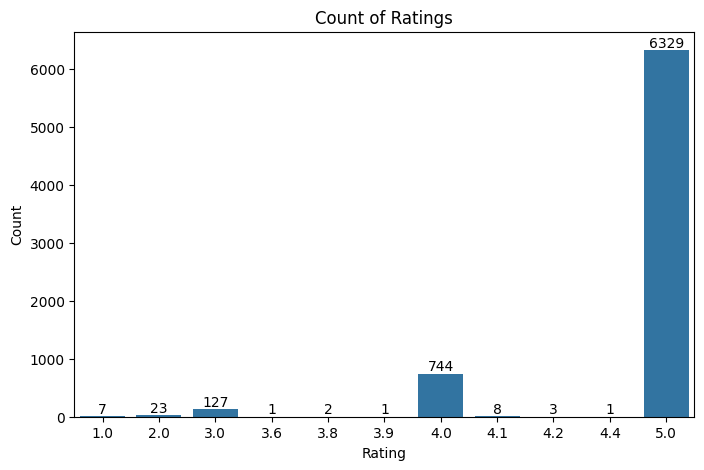

In [12]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='rating', data=df)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.title("Count of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


# Sentiment
Sentiment Mapping
- Positive Sentiment (1): Reviews with a perfect rating of 5.
- Negative Sentiment (0): Reviews with ratings of 4 or below.
- Any rating less than or equal to 4 is considered to be negative and only with rating of 5 is positive

In [13]:
df = df.reset_index(drop=True)

pos_neg = []
for i in range(len(df['rating'])):
    if df['rating'][i] == 5:
        pos_neg.append(1)        
    else:                           
        pos_neg.append(0)

df['label'] = pos_neg
df.head()


,rating,review,label
0,5.0,Very nice colors and nice clothes and Good fit...,1
1,4.1,Kurti is very good 👌👌👌 Best for daily wear ❤️ ...,0
2,4.4,I bought this Kurti for 196 rs and it is worth...,0
3,3.6,Jaisa dikhaya tha same to same aaya hai fabric...,0
4,3.8,Nice kurti kafi axa kurt ha kapda v Bhot acha ...,0


# Removing Punctuation and making the letter lower of comment column


In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\devas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
df.head()

,rating,review,label
0,5.0,Very nice colors and nice clothes and Good fit...,1
1,4.1,Kurti is very good 👌👌👌 Best for daily wear ❤️ ...,0
2,4.4,I bought this Kurti for 196 rs and it is worth...,0
3,3.6,Jaisa dikhaya tha same to same aaya hai fabric...,0
4,3.8,Nice kurti kafi axa kurt ha kapda v Bhot acha ...,0


In [16]:
stop_words = set(stopwords.words('english'))
nltk.download('punkt_tab')

def processing(text):
    processed_data = []
    
    for review in text:
        review = re.sub(r'[^,\w\s]', '', review)
        words = nltk.word_tokenize(review)
        cleaned_words = []
        
        for word in words:
            word = word.lower()
            if word not in stop_words:
                cleaned_words.append(word)
                
        processed_data.append(' '.join(cleaned_words))
    
    return processed_data


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\devas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [17]:
cleaned_reviews = processing(df['review'].values)
df['comment'] = cleaned_reviews

df.head()


,rating,review,label,comment
0,5.0,Very nice colors and nice clothes and Good fit...,1,nice colors nice clothes good fitting size
1,4.1,Kurti is very good 👌👌👌 Best for daily wear ❤️ ...,0,kurti good best daily wear kapda bhi thik hai ...
2,4.4,I bought this Kurti for 196 rs and it is worth...,0,bought kurti 196 rs worth money im sure happen...
3,3.6,Jaisa dikhaya tha same to same aaya hai fabric...,0,jaisa dikhaya tha aaya hai fabric bhi accha ha...
4,3.8,Nice kurti kafi axa kurt ha kapda v Bhot acha ...,0,nice kurti kafi axa kurt ha kapda v bhot acha ...


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7246 entries, 0 to 7245
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   rating   7246 non-null   float64
 1   review   7246 non-null   object 
 2   label    7246 non-null   int64  
 3   comment  7246 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 226.6+ KB


In [19]:
df['label'].value_counts()

label
1    6329
0     917
Name: count, dtype: int64

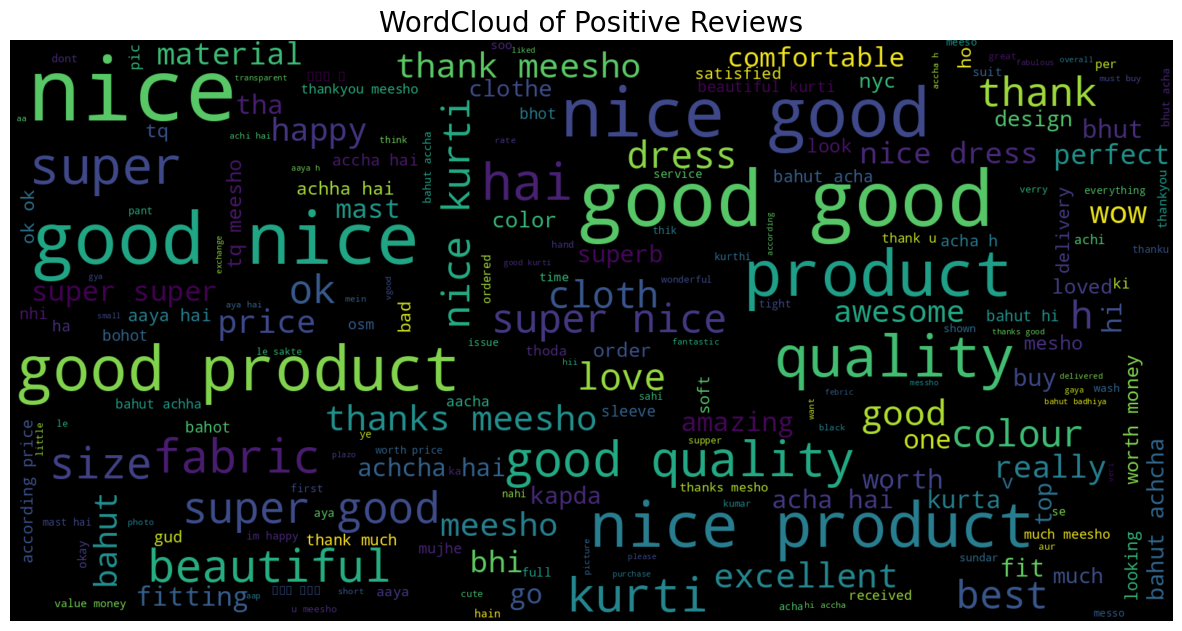

In [20]:
positive_text = ' '.join(df['comment'][df['label'] == 1].astype(str))

wc = WordCloud(
    width=1600,
    height=800,
    max_font_size=120,
    random_state=42,
    background_color='black'
)

plt.figure(figsize=(15, 10))
plt.imshow(wc.generate(positive_text), interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Positive Reviews", fontsize=20)
plt.show()


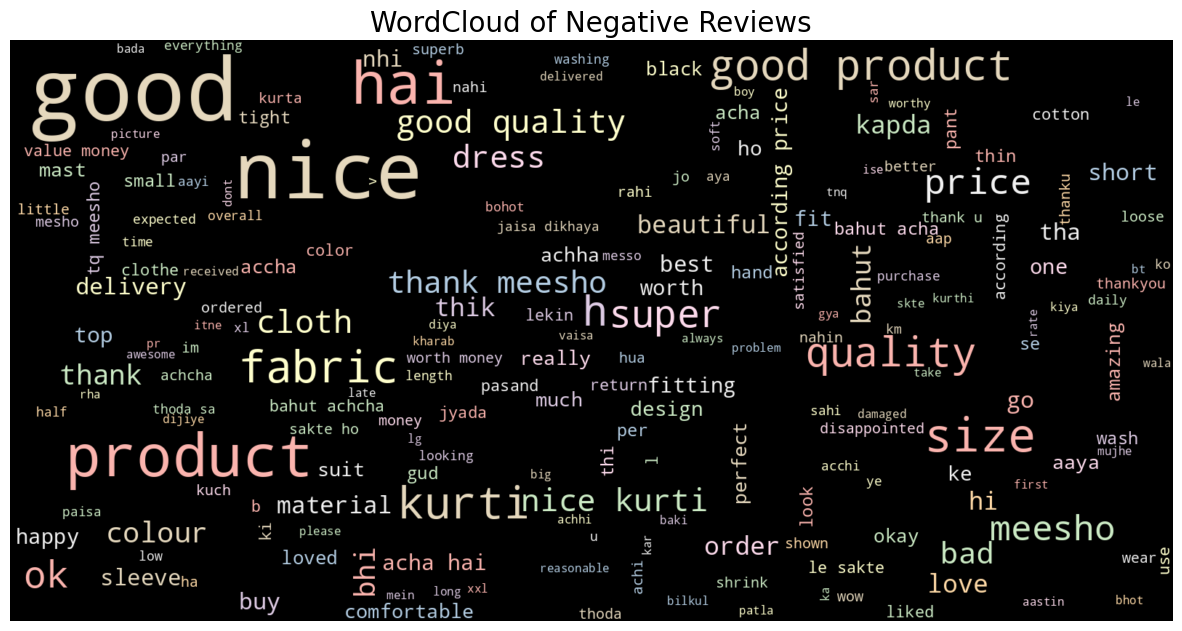

In [21]:
negative_text = ' '.join(df['comment'][df['label'] == 0].astype(str))

wc = WordCloud(
    width=1600,
    height=800,
    max_font_size=120,
    random_state=42,
    background_color='black',
    colormap='Pastel1'
)

plt.figure(figsize=(15, 10))
plt.imshow(wc.generate(negative_text), interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Negative Reviews", fontsize=20)
plt.show()


In [22]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(df['comment']).toarray()
X.shape

(7246, 2500)

# Model training, Evaluation, and Prediction

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X,                     # features
    df['label'],           # target labels
    test_size=0.33,        # 33% for testing
    stratify=df['label'],  # maintain label proportions
    random_state=42
)

In [24]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

train_predictions = dt_model.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, train_predictions))

Training Accuracy: 0.9476720230737536


# Confusion Matrix

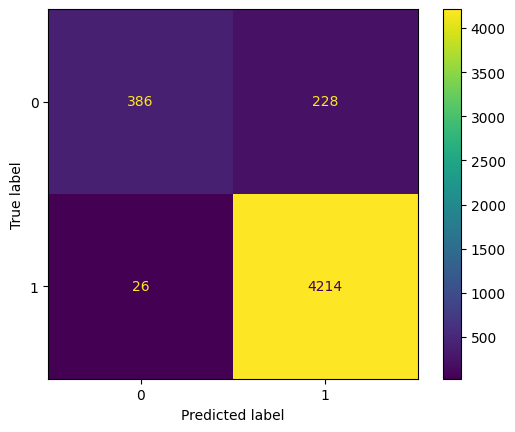

In [25]:
cm = confusion_matrix(y_train, train_predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

cm_display.plot()
plt.show()